# Decription of Dataset


fixed acidity: :most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines.

residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.

chlorides: the amount of salt in the wine.

free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine.

total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine.

density: the density of wine is close to that of water depending on the percent alcohol and sugar content.

pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.

sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant.

alcohol: the percent alcohol content of the wine.

quality: output variable (based on sensory data, score between 0 and 10).

# The library we use in this dataset is:


numpy|pandas: Will help us treat the data.
matplotlib|seaborn: Will help us plot the information so we can visualize it in different ways and have a better understanding of it.
sklearn: Will provide all necessary tools to train our models and test them afterwards.
math: Will provide some functions we might want to use when testing our models (sqrt)
prettytable: Will allow us to plot simple ascii tables

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from math import sqrt



# Data Cleaning and Checking

On this section we will check for undesired values such as NAN and get our data set prepared so we can train our model later on with  proper data. We will also check data types so we can transform them into numerical values if needed.

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head (15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.columns = df.columns.str.replace(' ','_')

As we can see, the name of some columns contains spaces, which is something we do not really wan when treating data, that's why we replace these space with '_'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data type is float64 and int64

In [6]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values and all datatypes seem to be right, since there are no object datatypes that must be converted to numerical values.

# Data Exploration 

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

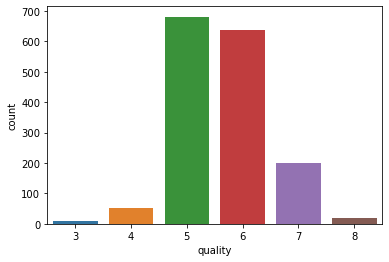

In [7]:
sns.countplot(df['quality'])
df['quality'].value_counts()

Now we know that target variables is quality

In [8]:
correlations = df.corr()['quality'].sort_values(ascending=False)
print(correlations)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric_acid             0.226373
fixed_acidity           0.124052
residual_sugar          0.013732
free_sulfur_dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total_sulfur_dioxide   -0.185100
volatile_acidity       -0.390558
Name: quality, dtype: float64


we study correlation between quality and other features.

<AxesSubplot:>

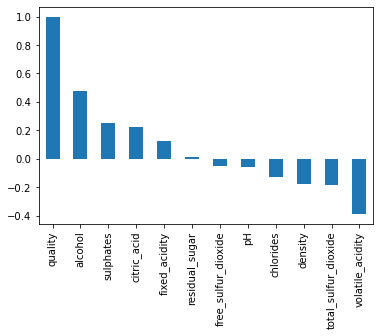

In [9]:
correlations.plot(kind='bar')

Having now the correlation values between quality and other features.

<AxesSubplot:>

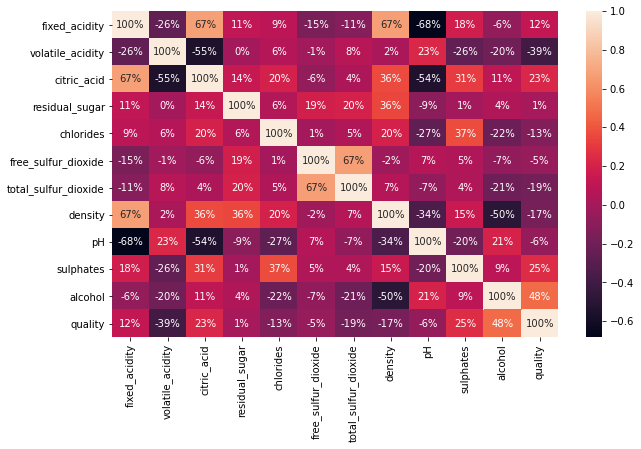

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

From this matrix we observe, apart form the information we had before, some obvious feature correlations such as pH and acidity. We  also observe that approximately half of these features correlate positively with quality while the other half correlate negatively 

In [11]:
print(abs(correlations) > 0.2)

quality                  True
alcohol                  True
sulphates                True
citric_acid              True
fixed_acidity           False
residual_sugar          False
free_sulfur_dioxide     False
pH                      False
chlorides               False
density                 False
total_sulfur_dioxide    False
volatile_acidity         True
Name: quality, dtype: bool


From all the values, we selection alcohol, sulphate, citric_acid and volatile_acidity in order to study them better and see the distribution of values that separate the qualities.

[Text(0.5, 1.0, 'Alcohol Percent in Different Quality Wines')]

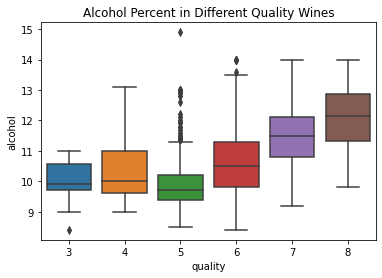

In [12]:
bp = sns.boxplot(x='quality',y='alcohol',data=df)
bp.set(title="Alcohol Percent in Different Quality Wines")

On this boxplot we can see how wines that contain less alcohol seem to be getting worse rating while the ones withe the higher alcohol % are getting better quality ratings. However we can observe how 'mid quality' wines with rating 5 or 6 are presenting some strange values.

In [13]:
df_quality_five_six = df.loc[(df['quality'] >= 5) & (df['quality'] <= 6)]
df_quality_five_six['quality'].value_counts()

5    681
6    638
Name: quality, dtype: int64

In [14]:
correlations_subset = df_quality_five_six.corr()['quality'].sort_values(ascending=False)
print(correlations_subset)

quality                 1.000000
alcohol                 0.375224
sulphates               0.162405
citric_acid             0.080146
fixed_acidity           0.053447
pH                      0.043065
residual_sugar         -0.018452
free_sulfur_dioxide    -0.060618
chlorides              -0.081813
density                -0.134559
volatile_acidity       -0.237193
total_sulfur_dioxide   -0.239067
Name: quality, dtype: float64


After calculating the correlations for wines with quality of 5 and 6 we find, that features that correlate the most with quality are the same as we obtained before. However, the difference of values shown on the boxplot can be explained due to having (although the highest) a poor correlation with quality.

# Sulphates and Citric Acid Presence

[Text(0.5, 1.0, 'Sulphate in Different Quality Wines')]

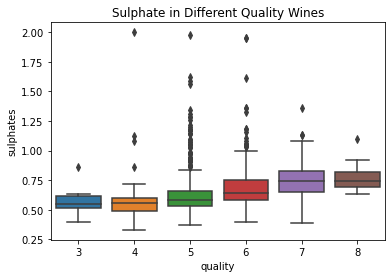

In [15]:
bp = sns.boxplot(x='quality',y='sulphates',data=df)
bp.set(title="Sulphate in Different Quality Wines")

[Text(0.5, 1.0, 'Citric Acid in Different Quality Wines')]

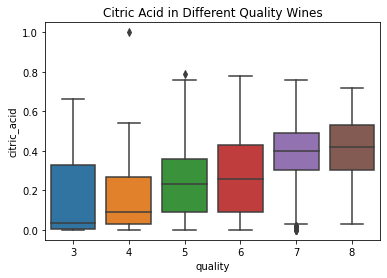

In [16]:
bp = sns.boxplot(x='quality',y = 'citric_acid',data=df)
bp.set(title="Citric Acid in Different Quality Wines")

In the case of the features "sulphates" and "citric_acid" the relation between them and quality seem to be linearly positive.

[Text(0.5, 1.0, 'Acetic Acid Presence in Different Quality Wines')]

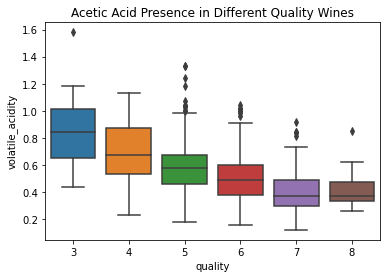

In [17]:
bp = sns.boxplot(x='quality',y= 'volatile_acidity',data=df)
bp.set(title="Acetic Acid Presence in Different Quality Wines")

For the acetic acid presence, we can clearly observe how less acetic acid presence in wine seems positive while having higher values contribute to having a lower rating.

In [18]:
df_aux = df.copy()
df_aux['quality'].replace([3,4],['low','low'],inplace=True)
df_aux['quality'].replace([5,6],['med','med'],inplace=True)
df_aux['quality'].replace([7,8],['high','high'],inplace=True)

<AxesSubplot:xlabel='quality', ylabel='count'>

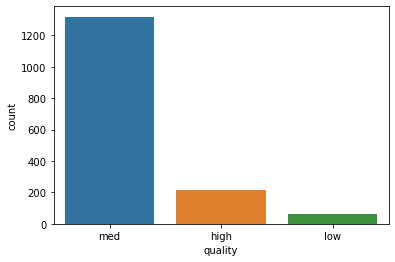

In [19]:
sns.countplot(df_aux['quality'])

In [20]:
correlations[abs(correlations) > 0.2]

quality             1.000000
alcohol             0.476166
sulphates           0.251397
citric_acid         0.226373
volatile_acidity   -0.390558
Name: quality, dtype: float64

In [21]:
X = df.loc[:,['alcohol','sulphates','citric_acid','volatile_acidity']]
Y = df.iloc[:,11]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_prediction_lr = regressor.predict(X_test)
y_prediction_lr = np.round(y_prediction_lr)

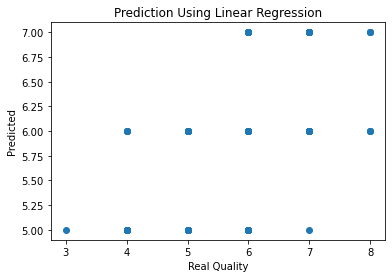

In [23]:
plt.scatter(y_test,y_prediction_lr)
plt.title("Prediction Using Linear Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

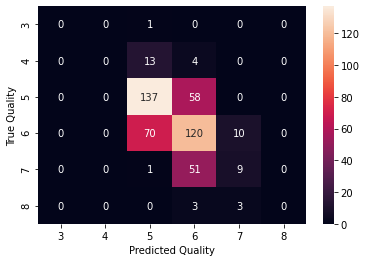

In [24]:
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# Decision Tree Regressor

In [25]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_prediction_dt = regressor.predict(X_test)
y_prediction_dt = np.round(y_prediction_dt)

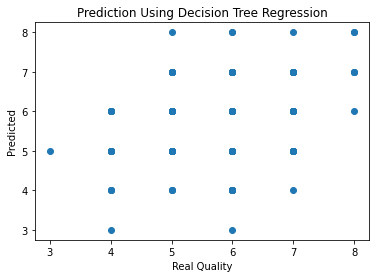

In [26]:
plt.scatter(y_test,y_prediction_dt)
plt.title("Prediction Using Decision Tree Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

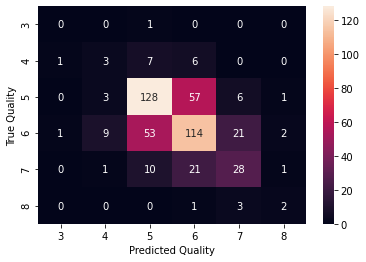

In [27]:
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

In [28]:
regressor = RandomForestRegressor(n_estimators=10,random_state = 42)
regressor.fit(X_train, y_train)
y_prediction_rf = regressor.predict(X_test)
y_prediction_rf = np.round(y_prediction_rf)

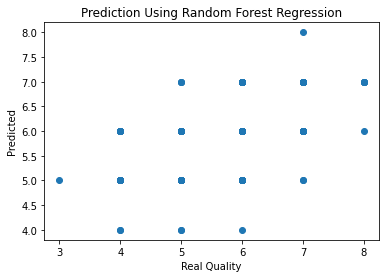

In [29]:
plt.scatter(y_test,y_prediction_rf)
plt.title("Prediction Using Random Forest Regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

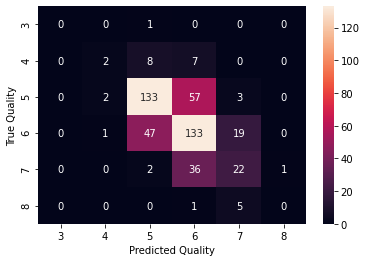

In [30]:
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

# Linear Regression RMSE

In [31]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_lr))
print(RMSE)

0.7085783889827104


# Decision Tree Regressor RMSE

In [32]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_dt))
print(RMSE)

0.8341662504161466


# Random Forest Regression RMSE

In [33]:
RMSE = sqrt(mean_squared_error(y_test, y_prediction_rf))
print(RMSE)

0.699702317656111


Random Forest Regression seems to be the best fitting algorithm.



In [34]:
def one_accuracy(predicted, true):
	i = 0
	for x,y in zip(predicted,true):
		if(abs(x-y)==1):
			predicted[i] = y
		i = i + 1

one_accuracy(y_prediction_lr, y_test)
one_accuracy(y_prediction_dt, y_test)
one_accuracy(y_prediction_rf, y_test)

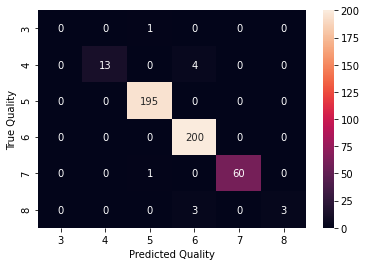

In [35]:
label_aux = plt.subplot()
cm_linear_regression = confusion_matrix(y_test,y_prediction_lr)
cm_lr = pd.DataFrame(cm_linear_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_lr,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

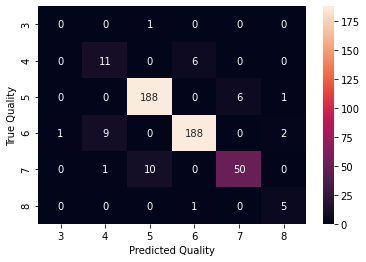

In [36]:
label_aux = plt.subplot()
cm_decision_tree_regression = confusion_matrix(y_test,y_prediction_dt)
cm_dt = pd.DataFrame(cm_decision_tree_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_dt,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

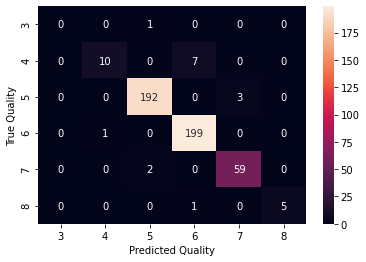

In [37]:
label_aux = plt.subplot()
cm_random_forest_regression = confusion_matrix(y_test,y_prediction_rf)
cm_rf = pd.DataFrame(cm_random_forest_regression,
                     index = ['3','4','5','6','7','8'], 
                     columns = ['3','4','5','6','7','8'])
sns.heatmap(cm_rf,annot=True,fmt="d")
label_aux.set_xlabel('Predicted Quality');label_aux.set_ylabel('True Quality');

As we can see, our results are far better than the ones we obtained before. Therefore we are now going to calculate the new RMSE for all the three models.

In [38]:
RMSE_lr = sqrt(mean_squared_error(y_test, y_prediction_lr))
print("RMSE for new improved Linear Regression is: " + str(RMSE_lr) + "\n")
RMSE_dt = sqrt(mean_squared_error(y_test, y_prediction_dt))
print("RMSE for new improved Decision Tree Regression is: " + str(RMSE_dt) + "\n")
RMSE_rf = sqrt(mean_squared_error(y_test, y_prediction_rf))
print("RMSE for new improved Random Forest Regression is: " + str(RMSE_rf) + "\n")

RMSE for new improved Linear Regression is: 0.27386127875258304

RMSE for new improved Decision Tree Regression is: 0.589844612306213

RMSE for new improved Random Forest Regression is: 0.3535533905932738



# Conclusions

After having obtained all the results through our models and plots, these are some things we can say about this problem and solution:

The vast majority of wines get a quality rating of five or six, while having good and bad wines seems more unlikely. There seem not to be any excellent wines (>8) on this database.

From the very first moment we saw there weren't strong correlations between features and quality, that's why it's hard to make an accurate prediction using regression algorithms. That said, alcohol, sulphates, citric_acid features are the ones that correlate the most positively while volatile_acidity is the one correlating the most negatively.

Applying the concept 1-off Accuracy gives us much better results.

Random Forest and Linear Regression seem to be the best fitting models when solving this problem using regression.

Since there are only six different quality values in this dataset, it would be clever treating this problem as a multiclass classification problem (we can use the quality grouping approach we took earlier) and we might even get better results.